## Importing the Dependency

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## Data Collection and Processing

In [2]:
df=pd.read_csv(r'C:\Users\Stella\Downloads\Loan_prediction\train_u6lujuX_CVtuZ9i (1).csv')

In [10]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [12]:
# Number of rows and columns
df.shape

(614, 13)

In [17]:
# Statistical measures 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# Returns the sum of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
# Drop the missing values
df=df.dropna()

In [20]:
# Verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [77]:
# label encoding
df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [78]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [79]:
# Dependent column values
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [80]:
# Replacing the value 3+ to 4
df=df.replace(to_replace='3+',value=4)

In [81]:
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

### Data Visualization

<Axes: xlabel='Education', ylabel='count'>

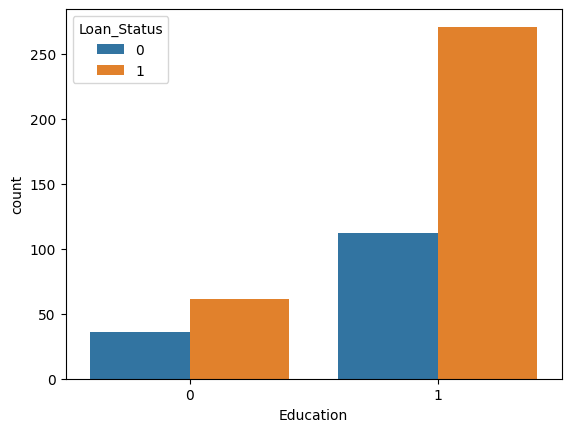

In [82]:
#Education and Loan status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

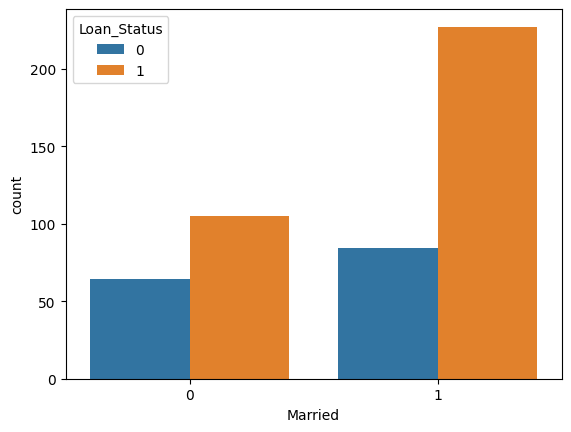

In [83]:
# Matital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

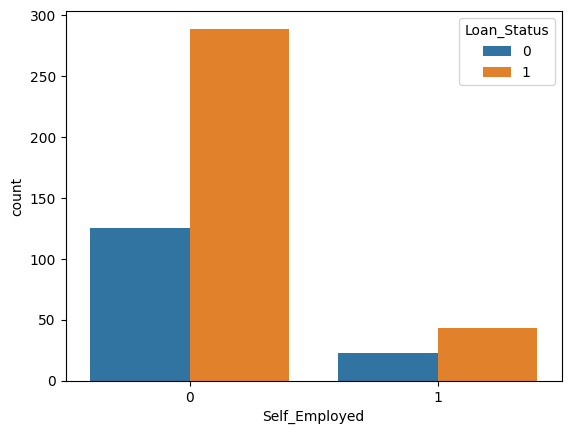

In [84]:
# Self_employed & Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

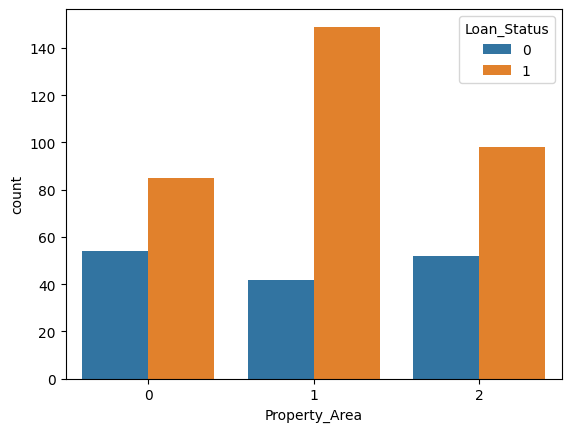

In [85]:
# Property_Area & Loan Status
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

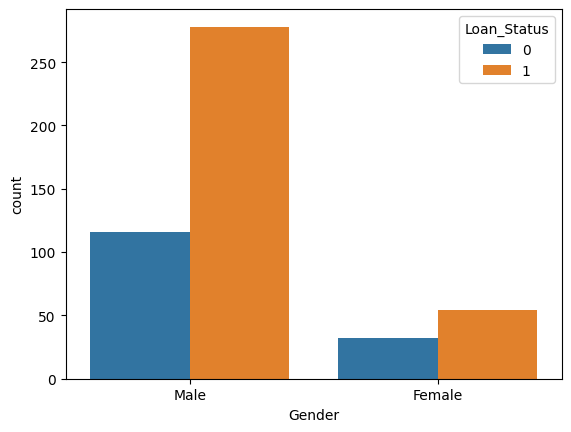

In [50]:
# Gender & Loan Status
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

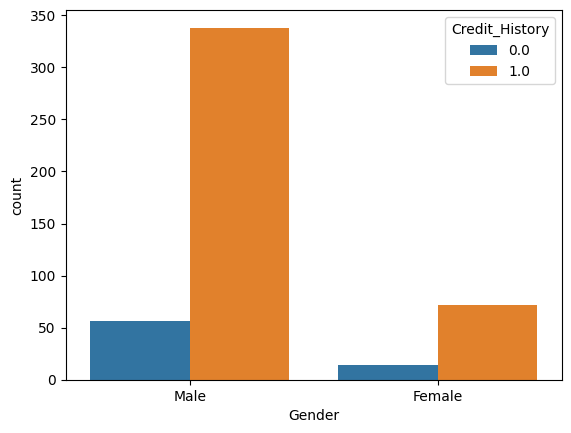

In [51]:
# Gender & Credit History
sns.countplot(x='Gender',hue='Credit_History',data=df)

In [90]:
# Convert categorical data to numerical
df.replace({'Married':{'No':0,'Yes':1},
            'Gender':{'Male':1,'Female':0},
           'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
           'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [91]:
#Separating the data and label
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [92]:
print(X)
print(Y)

     Gender  Married Dependents  Education  ...  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
1         1        1          1          1  ...       128.0             360.0             1.0              0
2         1        1          0          1  ...        66.0             360.0             1.0              2
3         1        1          0          0  ...       120.0             360.0             1.0              2
4         1        0          0          1  ...       141.0             360.0             1.0              2
5         1        1          2          1  ...       267.0             360.0             1.0              2
..      ...      ...        ...        ...  ...         ...               ...             ...            ...
609       0        0          0          1  ...        71.0             360.0             1.0              0
610       1        1          4          1  ...        40.0             180.0             1.0              0
611       1        

### Train Test Split


In [93]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [94]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (384, 11) (96, 11)


### Training the model:

### Support Vector Machine Model

In [95]:
classifier=svm.SVC(kernel='linear')

In [96]:
# Training the Support Vector Machine Model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

### Model Evaluation 


In [97]:
# Accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [98]:
print('Accuracy on training data :', training_data_accuracy)

Accuracy on training data : 0.7786458333333334


In [99]:
# Accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [100]:
print('Accuracy on test data :', test_data_accuracy)

Accuracy on test data : 0.8125


### Building a Predictive System

In [105]:
input_data=(1,1,1,1,0,4583,1508,128,360,1,0)

# Changing the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

# Reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Loan Approved')
else:
    print('Loan Not Approved')

[1]
Loan Approved


C:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
